Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
train loss:2.298295864840159
=== epoch:1, train acc:0.103, test acc:0.085 ===
train loss:2.2948442996211105
train loss:2.2923071165371356
train loss:2.2815935634178772
train loss:2.271279526916008
train loss:2.248013916558628
train loss:2.23157389797221
train loss:2.242169037089035
train loss:2.2209464937287398
train loss:2.1809510324552006
train loss:2.1617978143083563
train loss:2.1147103924491035
train loss:2.061188915396455
train loss:1.9936682051374248
train loss:1.9109219488198215
train loss:1.8994295368636052
train loss:1.8344781778566133
train loss:1.7779279616488273
train loss:1.6316780202765981
train loss:1.6220049198246762
train loss:1.5500428086302391
train loss:1.4074663665178024
t

train loss:0.0764462802540649
train loss:0.17585826204888516
train loss:0.27337808733089747
=============== Final Test Accuracy ===============
test acc:0.9
Saved Network Parameters!


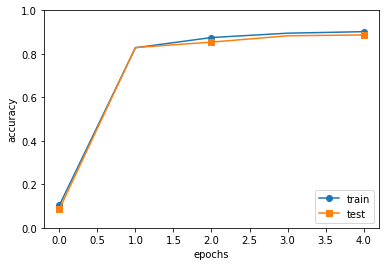

In [2]:
%matplotlib inline
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 処理に時間のかかる場合はデータを削減 
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 5 #20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# パラメータの保存
network.save_params("params.pkl")
print("Saved Network Parameters!")

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


# 感想
- 先週のコードを見直したところSigmoidの実装が少し違ったので直したらなんかうまく動いた